# 4.9 Intro to Data Visualization Part 2

## Instacart Grocery Basket Analysis

#### -Errol Hinkamp

##### Table of Contents

1. Import libraries
2. Import data
3. Exercise walkthrough
- 3.1 Create bar chart
- 3.2 Create histogram
- 3.3 Create scatterplot
- 3.4 Create line chart
 - 3.4.1 Create random sample of data
 - 3.4.2 Chart random sample
4. Create histogram of items ordered by hour of day
5. Create bar chart of unique orders by loyalty category
6. Create line chart of prices over course of day
7. Create line chart of dependents vs age
8. Create scatterplot of income vs age
9. Export data

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import data

In [2]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 4\Instacart Basket Analysis'
bigmerged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bigmerged_4.9.1.pkl'))

In [3]:
# Disable row limits
pd.options.display.max_rows = None

In [4]:
# Disable column limits
pd.options.display.max_columns = None

In [5]:
# Quick visual check of dataframe
bigmerged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,3144955,10331,4,5,11,30.0,196,3,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Marilyn,Olsen,Female,North Dakota,24,1/6/2017,3,married,73639
1,2300470,10331,1,2,14,NaN,21386,2,0,Smartwater,115,7,11.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Marilyn,Olsen,Female,North Dakota,24,1/6/2017,3,married,73639
2,1922742,10331,2,5,11,10.0,21386,2,1,Smartwater,115,7,11.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Marilyn,Olsen,Female,North Dakota,24,1/6/2017,3,married,73639
3,2300470,10331,1,2,14,NaN,42500,1,0,Orange & Lemon Flavor Variety Pack Sparkling F...,77,7,6.6,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Marilyn,Olsen,Female,North Dakota,24,1/6/2017,3,married,73639
4,1922742,10331,2,5,11,10.0,42500,3,1,Orange & Lemon Flavor Variety Pack Sparkling F...,77,7,6.6,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Marilyn,Olsen,Female,North Dakota,24,1/6/2017,3,married,73639


In [6]:
# Check shape
bigmerged.shape

(32399732, 29)

# 3. Exercise walkthrough

### 3.1 Create bar chart

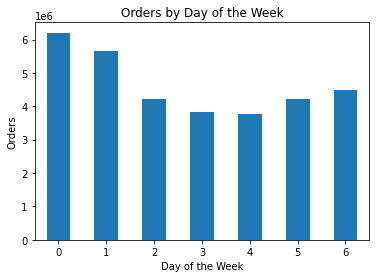

In [7]:
# Create bar chart of orders by day of week, sorted by day of week
bar = bigmerged['orders_day_of_week'].value_counts().sort_index().plot.bar(xlabel='Day of the Week', ylabel='Orders', title='Orders by Day of the Week', rot=0)

In [8]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 3.2 Create histogram

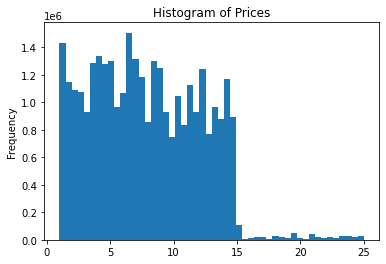

In [9]:
# Create histogram of prices
hist = bigmerged['prices'].plot.hist(bins=50, title='Histogram of Prices')

In [10]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### 3.3 Create scatterplot

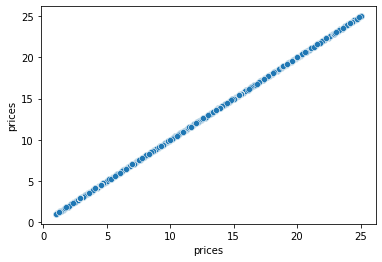

In [11]:
# Create scatterplot of prices
scat=sns.scatterplot(x = 'prices', y = 'prices',data = bigmerged)

In [12]:
# Export scatterplot
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scat_prices.png'))

### 3.4 Create line chart

#### 3.4.1 Create random sample of data

In [13]:
# Create 70/30 split of random numbers
np.random.seed(4)
dev = np.random.rand(len(bigmerged)) <= 0.7

In [14]:
# Split numbers into two datasets
big = bigmerged[dev]
small = bigmerged[~dev]

In [15]:
# Confirm dataset sizes
len(bigmerged)

32399732

In [16]:
len(big)+len(small)

32399732

In [17]:
# Trim unnecessary columns from smaller dataset
smaller = small[['orders_day_of_week','prices']]

In [18]:
# Quick visual check of new dataset
smaller.head()

,orders_day_of_week,prices
0,5,9.0
2,5,11.0
3,2,6.6
6,5,13.3
10,4,9.0


#### 3.4.2 Chart random sample

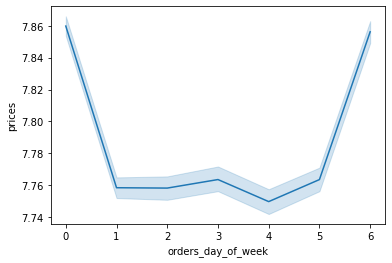

In [19]:
# Create & save line chart of prices vs day of the week from random sample of data
line = sns.lineplot(data = smaller, x = 'orders_day_of_week',y = 'prices')

##### I created a line chart with two different seed numbers (476 & 4) and neither of them resembled the chart in the exercise (though they matched each other, which is a good sign).

In [20]:
# Export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_prices_dow.png'))

# 4. Create histogram of items order by hour of day

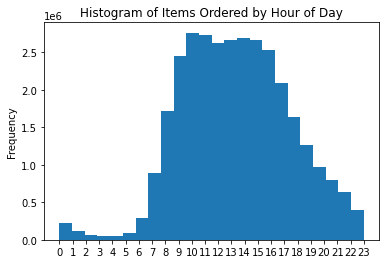

In [21]:
# Create & save histogram of "hour of day"
hist2=bigmerged['order_hour_of_day'].plot.hist(bins = 24, title='Histogram of Items Ordered by Hour of Day', xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

##### The bulk of items are ordered between 10:00 AM and 3:00 PM

In [22]:
# Export histogram
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_hour_of_day.png'))

# 5. Create bar chart of unique orders by loyalty category

In [23]:
# Determine number of unique orders per loyalty category
bigmerged.groupby('loyalty_flag')['order_id'].nunique(dropna=False)

loyalty_flag
Loyal customer      1024512
New customer         637044
Regular customer    1553112
Name: order_id, dtype: int64

In [24]:
# Make new dataset
loyalty_bar=bigmerged.groupby('loyalty_flag')['order_id'].nunique(dropna=False)

In [25]:
# Quick visual check of new dataset
loyalty_bar.head()

loyalty_flag
Loyal customer      1024512
New customer         637044
Regular customer    1553112
Name: order_id, dtype: int64

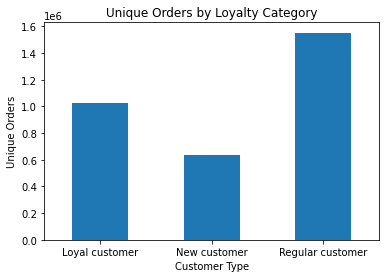

In [26]:
# Create & save bar chart of unique orders by loyalty category
bar2=loyalty_bar.plot.bar(xlabel='Customer Type', ylabel='Unique Orders', title='Unique Orders by Loyalty Category', rot=0)

In [27]:
# Export bar chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_loyalty.png'))

# 6. Create line chart of prices over course of day

In [28]:
# Trim unnecessary columns from smaller dataset
smaller1 = small[['order_hour_of_day','prices']]

In [29]:
# Quick visual check of new dataset
smaller1.head()

,order_hour_of_day,prices
0,11,9.0
2,11,11.0
3,14,6.6
6,11,13.3
10,11,9.0


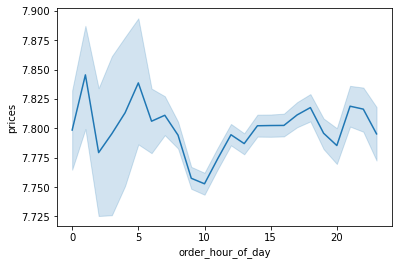

In [30]:
# Create & save line chart of prices vs hour of the day from random sample of data
line1 = sns.lineplot(data = smaller1, x = 'order_hour_of_day',y = 'prices')

In [31]:
# Export line chart
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_prices_hod.png'))

# 7. Create line chart of dependents vs age

In [32]:
# Trim unnecessary columns from smaller dataset
smaller2 = small[['Age','n_dependants']]

In [33]:
# Quick visual check of new dataset
smaller2.head()

,Age,n_dependants
0,24,3
2,24,3
3,24,3
6,24,3
10,42,2


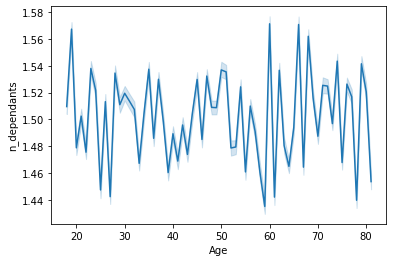

In [34]:
# Create & save line chart of prices vs hour of the day from random sample of data
line2 = sns.lineplot(data = smaller2, x = 'Age',y = 'n_dependants')

##### Seemingly no link between age and number of dependents

In [35]:
# Export line chart
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_age_dependents.png'))

# 8. Create scatterplot of income vs age

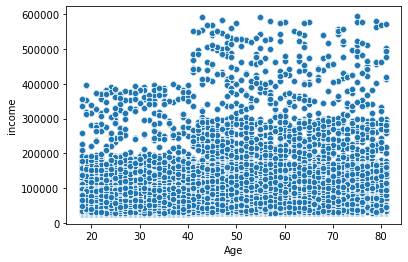

In [36]:
# Create & save scatterplot of age and spending power
scat1=sns.scatterplot(x = 'Age', y = 'income',data = bigmerged)

##### Scatterplot is too busy to get much useful data, though there do appear to be more higher-income people above the age of 40

In [37]:
# Export line chart
scat1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scat_age_income.png'))

# 9. Export data

In [38]:
# Export dataframe
bigmerged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'bigmerged_4.9.2.pkl'))